In [1]:
# LOAD THE NECESSARY LIBRARIES AND THE FILE

import pandas as pd
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BoycottChinaTweets.csv")

In [3]:
#Look at the data

df

,Unnamed: 0,Unnamed: 0.1,text
0,0,0,rt @rk_techno: really grat app\npure make in i...
1,1,1,rt @jay91743745: @matanevenoff thanks for your...
2,2,2,#hongkong #democracyforhk #humanrights #antina...
3,3,3,rt @mrocksmedia: the department for promotion ...
4,4,4,"rt @olivierberiaul1: $800,000 worth of 13-ton ..."
...,...,...,...
3701,3701,3701,2/2 \nlet me shed some light in laymen's term....
3702,3702,3702,"modi rocks ,china shocks now this apps are ban..."
3703,3703,3703,rt @narayan41925783: दुनिया पर अपना वर्चस्व स्...
3704,3704,3704,@mgmotorin this is chinese company.\n#bycottch...


## CLEANING THE DATA

In [4]:
#Removing unnecessary columns
df = df.drop(labels=['Unnamed: 0', 'Unnamed: 0.1'],axis=1)

In [5]:
#Converting all text to lowercase
df['text'] = df['text'].str.lower()


In [6]:
#Clean the text by removing @mentions, #hashtags , Links
def cleantext(text):
    text = (re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(corona)|(deaths)|(recovered)|(active)|(recovered)|(confirmed)"," ",text))
    
    return text

df['text'] = df['text'].apply(cleantext)

## REFINING TWEETS 

In [7]:
#Tokenizing tweets
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [8]:
#REMOVING STOP WORDS
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['tokens']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['stem_meaningful'] = df.apply(remove_stops, axis=1)

In [9]:
#REJOIN WORDS

def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

df['processed'] = df.apply(rejoin_words, axis=1)

In [10]:
df

,text,tokens,stem_meaningful,processed
0,rt techno really grat app pure make in indi...,"[rt, techno, really, grat, app, pure, make, in...","[rt, techno, really, grat, app, pure, make, in...",rt techno really grat app pure make india 100 ...
1,rt thanks for your support boycottmula...,"[rt, thanks, for, your, support, boycottmulan,...","[rt, thanks, support, boycottmulan, support, f...",rt thanks support boycottmulan support freedom...
2,hongkong democracyforhk humanrights antina...,"[hongkong, democracyforhk, humanrights, antina...","[hongkong, democracyforhk, humanrights, antina...",hongkong democracyforhk humanrights antination...
3,rt the department for promotion of industry...,"[rt, the, department, for, promotion, of, indu...","[rt, department, promotion, industry, internal...",rt department promotion industry internal trad...
4,rt 800 000 worth of 13 ton real human hair...,"[rt, 800, 000, worth, of, 13, ton, real, human...","[rt, 800, 000, worth, 13, ton, real, human, ha...",rt 800 000 worth 13 ton real human hair detect...
...,...,...,...,...
3701,2 2 let me shed some light in laymen s term ...,"[2, 2, let, me, shed, some, light, in, laymen,...","[2, 2, let, shed, light, laymen, term, got, 10...",2 2 let shed light laymen term got 100 lost 2 ...
3702,modi rocks china shocks now this apps are ban...,"[modi, rocks, china, shocks, now, this, apps, ...","[modi, rocks, china, shocks, apps, banned, ind...",modi rocks china shocks apps banned india byco...
3703,rt ...,"[rt, china, bycottchineseapp, bycottchinaproduct]","[rt, china, bycottchineseapp, bycottchinaproduct]",rt china bycottchineseapp bycottchinaproduct
3704,this is chinese company bycottchineseprodu...,"[this, is, chinese, company, bycottchineseprod...","[chinese, company, bycottchineseproducts, byco...",chinese company bycottchineseproducts bycottch...


In [11]:
#processed is the final column we need, let's remove all other columns
df = df.drop(labels=['text','tokens','stem_meaningful'],axis=1)

In [12]:
df

,processed
0,rt techno really grat app pure make india 100 ...
1,rt thanks support boycottmulan support freedom...
2,hongkong democracyforhk humanrights antination...
3,rt department promotion industry internal trad...
4,rt 800 000 worth 13 ton real human hair detect...
...,...
3701,2 2 let shed light laymen term got 100 lost 2 ...
3702,modi rocks china shocks apps banned india byco...
3703,rt china bycottchineseapp bycottchinaproduct
3704,chinese company bycottchineseproducts bycottch...


In [13]:
#renaming the column
df = df.rename(columns={'processed':'Tweets'})
df

,Tweets
0,rt techno really grat app pure make india 100 ...
1,rt thanks support boycottmulan support freedom...
2,hongkong democracyforhk humanrights antination...
3,rt department promotion industry internal trad...
4,rt 800 000 worth 13 ton real human hair detect...
...,...
3701,2 2 let shed light laymen term got 100 lost 2 ...
3702,modi rocks china shocks apps banned india byco...
3703,rt china bycottchineseapp bycottchinaproduct
3704,chinese company bycottchineseproducts bycottch...


## GETTING SUBJECTIVITY AND POLARITY OF EACH TWEET

In [14]:
#Creating a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Creating a function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['polarity']=df['Tweets'].apply(getpolarity)
df

,Tweets,subjectivity,polarity
0,rt techno really grat app pure make india 100 ...,0.400000,0.209524
1,rt thanks support boycottmulan support freedom...,0.200000,0.200000
2,hongkong democracyforhk humanrights antination...,0.000000,0.000000
3,rt department promotion industry internal trad...,0.000000,0.000000
4,rt 800 000 worth 13 ton real human hair detect...,0.083333,0.100000
...,...,...,...
3701,2 2 let shed light laymen term got 100 lost 2 ...,0.700000,0.400000
3702,modi rocks china shocks apps banned india byco...,0.000000,0.000000
3703,rt china bycottchineseapp bycottchinaproduct,0.000000,0.000000
3704,chinese company bycottchineseproducts bycottch...,0.000000,0.000000


## PLOTTING WORD CLOUD

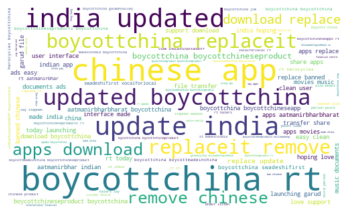

In [15]:
#Plot the word cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordcloud = WordCloud(width =500, height=300 , random_state=21 ,max_words=200,mode='RGB',background_color='white', max_font_size=50).generate(allWords)

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [16]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [17]:
#GETTING THE NUMBER OF WORDS IN COMBINATION OF ALL REVIEW
text = " ".join(review for review in df.Tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 394370 words in the combination of all review.


## ASSIGNING POSITIVE, NEGATIVE AND NEUTRAL SENTIMENT

In [18]:
#Create a function to get the negative, positive and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Positive'
    
df['analysis'] = df['polarity'].apply(getAnalysis)

df

,Tweets,subjectivity,polarity,analysis
0,rt techno really grat app pure make india 100 ...,0.400000,0.209524,Positive
1,rt thanks support boycottmulan support freedom...,0.200000,0.200000,Positive
2,hongkong democracyforhk humanrights antination...,0.000000,0.000000,Neutral
3,rt department promotion industry internal trad...,0.000000,0.000000,Neutral
4,rt 800 000 worth 13 ton real human hair detect...,0.083333,0.100000,Positive
...,...,...,...,...
3701,2 2 let shed light laymen term got 100 lost 2 ...,0.700000,0.400000,Positive
3702,modi rocks china shocks apps banned india byco...,0.000000,0.000000,Neutral
3703,rt china bycottchineseapp bycottchinaproduct,0.000000,0.000000,Neutral
3704,chinese company bycottchineseproducts bycottch...,0.000000,0.000000,Neutral


## REMOVING ALL THE NEUTRAL TWEETS FOR BETTER RESULTS

In [19]:

df = df[df.analysis != 'Neutral']

In [20]:
#RESETTING THE INDEX
df.reset_index(inplace = True, drop = True) 
df

,Tweets,subjectivity,polarity,analysis
0,rt techno really grat app pure make india 100 ...,0.400000,0.209524,Positive
1,rt thanks support boycottmulan support freedom...,0.200000,0.200000,Positive
2,rt 800 000 worth 13 ton real human hair detect...,0.083333,0.100000,Positive
3,rt today launching garud file transfer share a...,0.711111,0.433333,Positive
4,rt china crackdown international financial cen...,0.208333,0.108333,Positive
...,...,...,...,...
1116,good morning aaj kya boycott krna hai tiktok n...,0.600000,0.700000,Positive
1117,bycottchina bycottchinaproduct never successfu...,0.470000,-0.075000,Negative
1118,chineseappsblocked finally one dream cames tru...,0.825000,0.175000,Positive
1119,chinese apps need bycott right bycottchina byc...,0.267857,0.142857,Positive


In [21]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0 , sortedDF.shape[0]):
    if(sortedDF['analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) rt techno really grat app pure make india 100 pure indian upmanchapp digitalindia boycottchina indianapp

2) rt thanks support boycottmulan support freedom standwithhongkong boycottchina need help sos hkers

3) rt 800 000 worth 13 ton real human hair detected us custom hair harvested uyghur detainees chinese concentration camps act stop buying made china retweet agree uyghurs boycottchinaproducts boycottchina

4) rt today launching garud file transfer share apps movies music documents ads easy clean user interface made india hoping love support download boycottchina swadeshifirst vocalforlocal

5) rt china crackdown international financial centre easily one stop global threat boycottchina

6) rt 800 000 worth 13 ton real human hair detected us custom hair harvested uyghur detainees chinese concentration camps act stop buying made china retweet agree uyghurs boycottchinaproducts boycottchina

7) rt proud dem herocycles boycottchineseproducts boycottchina

8) proud dem herocycles boyc

425) rt go fight border best promise buy chinese products henceforth boycottchineseproduct boycottchina

426) rt china changing labeling made p r c boycottchina working hurting ccp success keep fighting

427) rt today launching garud file transfer share apps movies music documents ads easy clean user interface made india hoping love support download boycottchina swadeshifirst vocalforlocal

428) tiktok sends dogecoin price 2 year high twitter says smart blockchain socialmedia cryptocurrency dogecoin tiktok dogecointiktokchallange boycottchina

429) rt today launching garud file transfer share apps movies music documents ads easy clean user interface made india hoping love support download boycottchina swadeshifirst vocalforlocal

430) rt today launching garud file transfer share apps movies music documents ads easy clean user interface made india hoping love support download boycottchina swadeshifirst vocalforlocal

431) rt social jivani update india 638039 232838 386736 18399 updated 

841) china banned google facebook twitter many foreign website social media app china want people use country app india banned many 59 chinese app banned app country also banned chinese app bycottchina bycottchinaproduct

842) chinese mobile mi 9 note pro sell 30 1lakh mobile social media boycott status msg govt bycottchinaproduct

843) many countries including america brazil india suffered deadly epidemic world main reason china still ignoring result even serious bycottchinaproduct

844) yes ready bycottchineseapp bycottchina bycottchinaproduct jai hind jai bharat

845) yes ready bycottchineseapp bycottchina bycottchinaproduct jai hind jai bharat

846) ek pehle bycottchinaproduct chal rha hai upar se tum logo ki service bhi aisi hai 3 days action taken go

847) chinese foreign ministry giving statement tiktok ak sure titok others app entertainment part deep assets bycottchinaproduct

848) chinese foreign ministry giving statement tiktok ak sure titok others app entertainment part deep

In [22]:
#Print all of the negative tweets

j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0 , sortedDF.shape[0]):
    if(sortedDF['analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) still ready overtake china still running toward use alternative instead create makeinindia never successful change mindset beacreator beinnovator boycottchina

2) ccp spreading fake news free world must take evil empire china terrorist makechinapay boycottchina

3) gt china fault world isolating china bad behavior bully world china pay plagues come china never trust china boycottchina isolatechina chinesearethieves

4) tiktokers talent go waste new app totally made india reduce dependence china start using indian apps support aatmanirbharbharat boycottchina boycottchineseproduct rizzle madeinindia downloadrizzle

5) children china locked long 10 days internet addiction camp um reeducation camps china boycottchineseproducts boycottchina news

6) rt midst cold war boycottchina defundtheccp

7) midst cold war boycottchina defundtheccp

8) chinese china destroy democracy freedom entire world soon democracy country like germany fight dictatorship stop china boycott china ccp terrorist bo

234) rt days ago tiktok deleted 8 million reviews googleplay usa ban india already banned exiting china friends evil ccp come huge price standwithhongkong makechinapay boycottchina

235) rt agree warnings taken seriously china global threat people entire animal world planet whole boycottchina boycottchineseproducts maga2020 americafirst anywherebutchina

236) rt days ago tiktok deleted 8 million reviews googleplay usa ban india already banned exiting china friends evil ccp come huge price standwithhongkong makechinapay boycottchina

237) rt made china made concentration camps forced labor buy one less product day buy week boycott month one step time share agree madeinchina boycottchina

238) sameshitdifferentday china confucius institutes rebrand overseas propaganda rows us iran aka 1 state sponsor terrorism norway aka friend iran japan england korea taiwan canada boycottchina germany france exitgermany

239) rt dolly ethnic genocide take actions late sanctionchina boycottchinaproducts

## VISUALIZING TWEETS

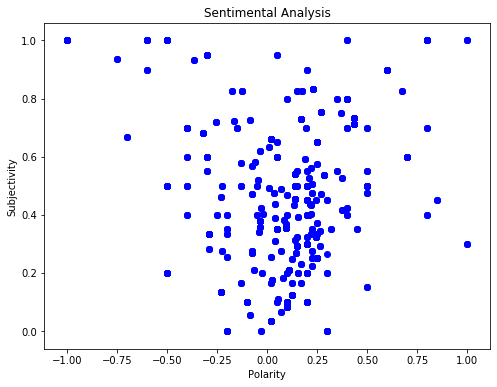

In [23]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [24]:
#Getting the percentage of positive tweets
ptweets = df[df.analysis == 'Positive']
ptweets = ptweets['Tweets']

print("Percentage of positive tweets: ",round( (ptweets.shape[0] /df.shape[0])*100 , 1))

#Getting the percentage of neutral tweets
ptweets = df[df.analysis == 'Neutral']
ptweets = ptweets['Tweets']

print("Percentage of neutral tweets: ",round( (ptweets.shape[0] /df.shape[0])*100 , 1))


#Getting the percentage of negative tweets
ptweets = df[df.analysis == 'Negative']
ptweets = ptweets['Tweets']

print("Percentage of negative tweets: ",round( (ptweets.shape[0] /df.shape[0])*100 , 1))

Percentage of positive tweets:  76.0
Percentage of neutral tweets:  0.0
Percentage of negative tweets:  24.0


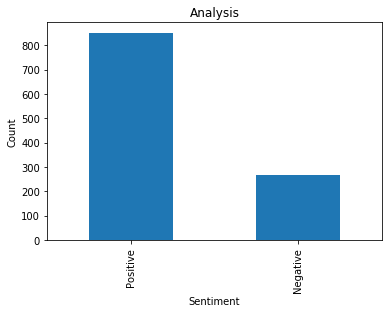

In [25]:
#Show the value counts

fig=df['analysis'].value_counts()

#plot and visualize the counts
plt.title('Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['analysis'].value_counts().plot(kind='bar')
plt.show()


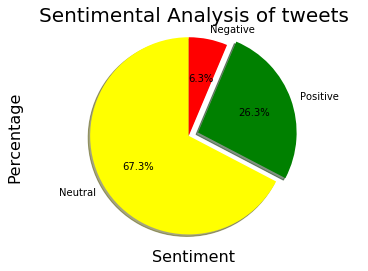

In [26]:
labels = 'Neutral','Positive', 'Negative'
sizes = [80.6,31.5,7.6]
colors= 'Yellow','Green','Red'
explode = (0, 0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentimental Analysis of tweets',fontsize=20)
plt.xlabel('Sentiment',fontsize=16)
plt.ylabel('Percentage',fontsize=16)

plt.show()
fig1.savefig('PieChart.jpeg')

In [27]:
df.to_csv('final.csv')

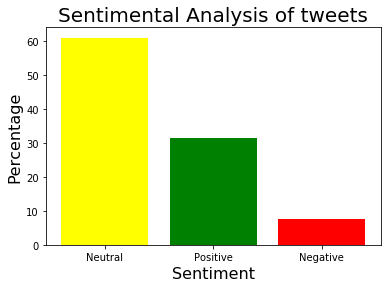

In [28]:
fig = plt.figure()
barWidth = 0.5
labels = 'Neutral','Positive', 'Negative'
sizes = [60.9,31.5,7.6]
colors= 'Yellow','Green','Red'
plt.bar(labels,height=sizes,color=colors)
plt.title('Sentimental Analysis of tweets',fontsize=20)
plt.xlabel('Sentiment',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.show()
fig.savefig('barplot.jpeg')

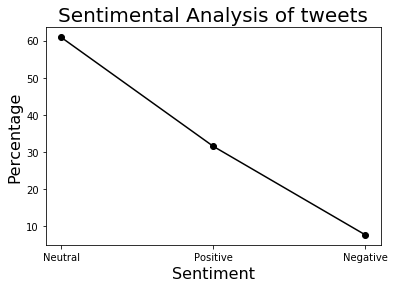

In [29]:
fig = plt.figure()
plt.plot(labels,sizes,color='black',marker='o')
plt.title('Sentimental Analysis of tweets',fontsize=20)
plt.xlabel('Sentiment',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.show()
fig.savefig('linegraph.jpeg')

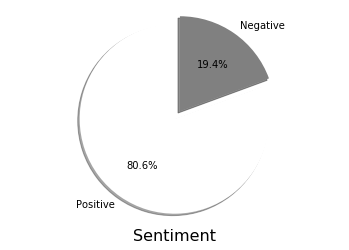

In [30]:
labels = 'Positive', 'Negative'
sizes = [80.6,19.4]
colors= 'White','Grey'
explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Sentimental Analysis of tweets',fontsize=20)
plt.xlabel('Sentiment',fontsize=16)
#plt.ylabel('Percentage',fontsize=16)

plt.show()
fig1.savefig('PieChart1.jpeg')